<center><img src="Netflix-Movie-Analysis.png"></center>

# Netflix Movie Data Analysis

Over the past 80 years of cinema, the landscape has changed drastically around the world. In this project, we will explore and analyze Netflix's extensive catalog of movies and series to uncover valuable insights. Netflix, which began as a DVD rental service in 1997, has grown into one of the largest entertainment and media companies globally. With a vast array of content available on the platform, it presents a unique opportunity to delve into the entertainment industry and extract meaningful patterns and trends. In this analysis, we explore a dataset of Netflix movies to uncover various insights about the film industry.

## Project Objectives

Understanding the dynamics of Netflix's content library is crucial for stakeholders in the entertainment industry. By analyzing this data, we can:

- Identify popular genres and trends over time.
- Understand the distribution of content across different countries.
- Gain insights into the types of shows and movies that resonate with audiences.
- Inform strategic decisions for content creation and acquisition.

This project is particularly relevant for production companies, content creators, and marketers who aim to align their strategies with audience preferences and industry trends.

## Table of Contents

1. **Introduction**
   - Overview of the project
   - Importance and relevance

2. **Data Overview**
   - Description of the dataset
   - Column names and descriptions

3. **Data Cleaning & Preparation**
   - Handling missing values
   - Data type conversions
   - Filtering data for analysis

4. **Exploratory Data Analysis**
   - Overview of content by column

5. **Visualizations & Data Analysis**
   - Genre distribution analysis
   - Country-wise content analysis

6. **Conclusion**
   - Summary of findings
   - Recommendations for stakeholders

7. **Further Exploration**
   - Suggestions for additional analysis
   - Potential areas for future research

8. **Credits**

In [48]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

## Data Overview

The `netflix_data.csv` dataset contains information about various movies available on Netflix. Below is a description of the columns in the dataset:

| Column Name   | Description |
|---------------|-------------|
| `index`       | A unique identifier for each row. |
| `show_id`     | A unique identifier for each movie. |
| `type`        | The type of the show (Movie/TV show). |
| `title`       | The title of the movie. |
| `director`    | The director of the movie. |
| `cast`        | The main cast of the movie. |
| `country`     | The country where the movie was produced. |
| `date_added`  | The date when the movie was added to Netflix. |
| `release_year`| The year the movie was released. |
| `duration`    | The duration of the show in minutes. |
| `description` | A brief description of the movie. |
| `genre`       | The genre of the movie. **|**

In [49]:
# Preview data
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [50]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


In [51]:
netflix_df.describe()

,release_year,duration
count,4812.000000,4812.000000
mean,2012.711554,99.566708
std,9.517978,30.889305
min,1942.000000,1.000000
25%,2011.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,116.000000
max,2021.000000,253.000000


---
## Data Cleaning & Preparation
### Duration
To investigate the outlier of 1-minute movies in the `netflix_df` DataFrame, we can filter the DataFrame to find entries with a duration of 1 minute. This will help us identify the specific movie and examine its details.

In [52]:
# Filter the DataFrame for movies with a duration of less then 10
minute_movies = netflix_df[netflix_df['duration'] <= 10]

# Display the details of the 1-minute movies
minute_movies

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV
94,s133,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,"July 30, 2019",2019,1,Multiple women report their husbands as missin...,TV Shows
151,s219,TV Show,A Queen Is Born,Carla Barros,"Gloria Groove, Alexia Twister",Brazil,"November 11, 2020",2020,1,Gloria Groove and Alexia Twister make drag dre...,International TV
181,s261,TV Show,A.I.C.O.,Kazuya Murata,"Haruka Shiraishi, Yusuke Kobayashi, Makoto Fur...",Japan,"March 9, 2018",2018,1,Everything Aiko knew was a lie. Now she's join...,Anime Series
197,s277,TV Show,Abby Hatcher,Kyran Kelly,"Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...",United States,"July 1, 2020",2019,1,A big-hearted girl helps her Fuzzly friends wh...,Kids
...,...,...,...,...,...,...,...,...,...,...,...
4580,s7386,TV Show,Valeria,Inma Torrente,"Diana Gómez, Silma López, Paula Malia, Teresa ...",Spain,"May 8, 2020",2020,1,A writer in creative and marital crises finds ...,International TV
4588,s7401,TV Show,Velvet,Carlos Sedes,"Paula Echevarría, Miguel Ángel Silvestre, Aita...",Spain,"March 4, 2020",2016,4,"In 1950s Spain, the heir to a fashion house ro...",International TV
4645,s7493,TV Show,Watership Down,Noam Murro,"James McAvoy, Nicholas Hoult, John Boyega, Ben...",United Kingdom,"December 23, 2018",2018,1,A warren of rabbits battles many threats on th...,British TV
4740,s7667,TV Show,World of Winx,Iginio Straffi,"Haven Paschall, Alysha Deslorieux, Jessica Paq...",Italy,"June 16, 2017",2017,2,"The reality show ""WOW!"" engages the Winx in th...",Kids


TV shows in the data show as one minute representing one season of a series. Since this analysis is focused on movies, we will remove them.

In [53]:
# Remove entries with a duration of 1 minute
netflix_df_cleaned = netflix_df[netflix_df['duration'] > 10]

# Verify changes
netflix_df_cleaned.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
5,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


### Genre

In [54]:
# View genre counts
genre_counts = netflix_df_cleaned['genre'].value_counts()
genre_counts

Dramas                  1342
Comedies                1029
Action                   696
Children                 421
Documentaries            352
Stand-Up                 276
Horror Movies            239
International Movies     100
Classic Movies            69
Thrillers                 49
Uncategorized             25
Independent Movies        20
Anime Features            18
Music                     14
Sci-Fi                    11
Cult Movies               11
Romantic Movies            3
Classic                    1
LGBTQ Movies               1
Name: genre, dtype: int64

There are many genres with few entries in the dataset. We will group these together as an "Other" category. Additionally, we will change the "Uncategorized" label to "Other."

In [55]:
# Group genres with 20 or fewer entries as "Other"
genres_to_replace = genre_counts[genre_counts <= 20].index

# Create a new dataframe with the updated genre grouping
netflix_df_grouped = netflix_df_cleaned.copy()
netflix_df_grouped['genre'] = netflix_df_grouped['genre'].replace(genres_to_replace, 'Other')

# Change "Uncategorized" label to "Other"
netflix_df_grouped['genre'] = netflix_df_grouped['genre'].map(lambda x: 'Other' if x == "Uncategorized" else x)

# Calculate new genre counts
genre_counts_grouped = netflix_df_grouped['genre'].value_counts()
genre_counts_grouped

Dramas                  1342
Comedies                1029
Action                   696
Children                 421
Documentaries            352
Stand-Up                 276
Horror Movies            239
Other                    104
International Movies     100
Classic Movies            69
Thrillers                 49
Name: genre, dtype: int64

### Country

In [56]:
netflix_df_cleaned['country'].value_counts()

United States     1856
India              858
United Kingdom     289
Canada             151
France             129
                  ... 
Venezuela            1
Zimbabwe             1
Namibia              1
Soviet Union         1
Croatia              1
Name: country, Length: 72, dtype: int64

There are many countries with few entries in the dataset. For this analysis, we will examine the 20 most frequent countries.

In [57]:
# Filter movies by the top 20 most common countries from the dataset
top_countries = netflix_df_cleaned[netflix_df_cleaned['country'].isin(netflix_df_cleaned['country'].value_counts().head(20).index)].copy()

# Verify that the DataFrame filtered correctly
top_countries

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
5,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
...,...,...,...,...,...,...,...,...,...,...,...
4806,s7777,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,"November 1, 2018",2011,104,"When his cruel uncle abandons him, a young orp...",Children
4807,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,88,Looking to survive in a world taken over by zo...,Comedies
4808,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,94,A drug dealer starts having doubts about his t...,Dramas
4809,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children


## Exploratory Data Analysis (EDA)

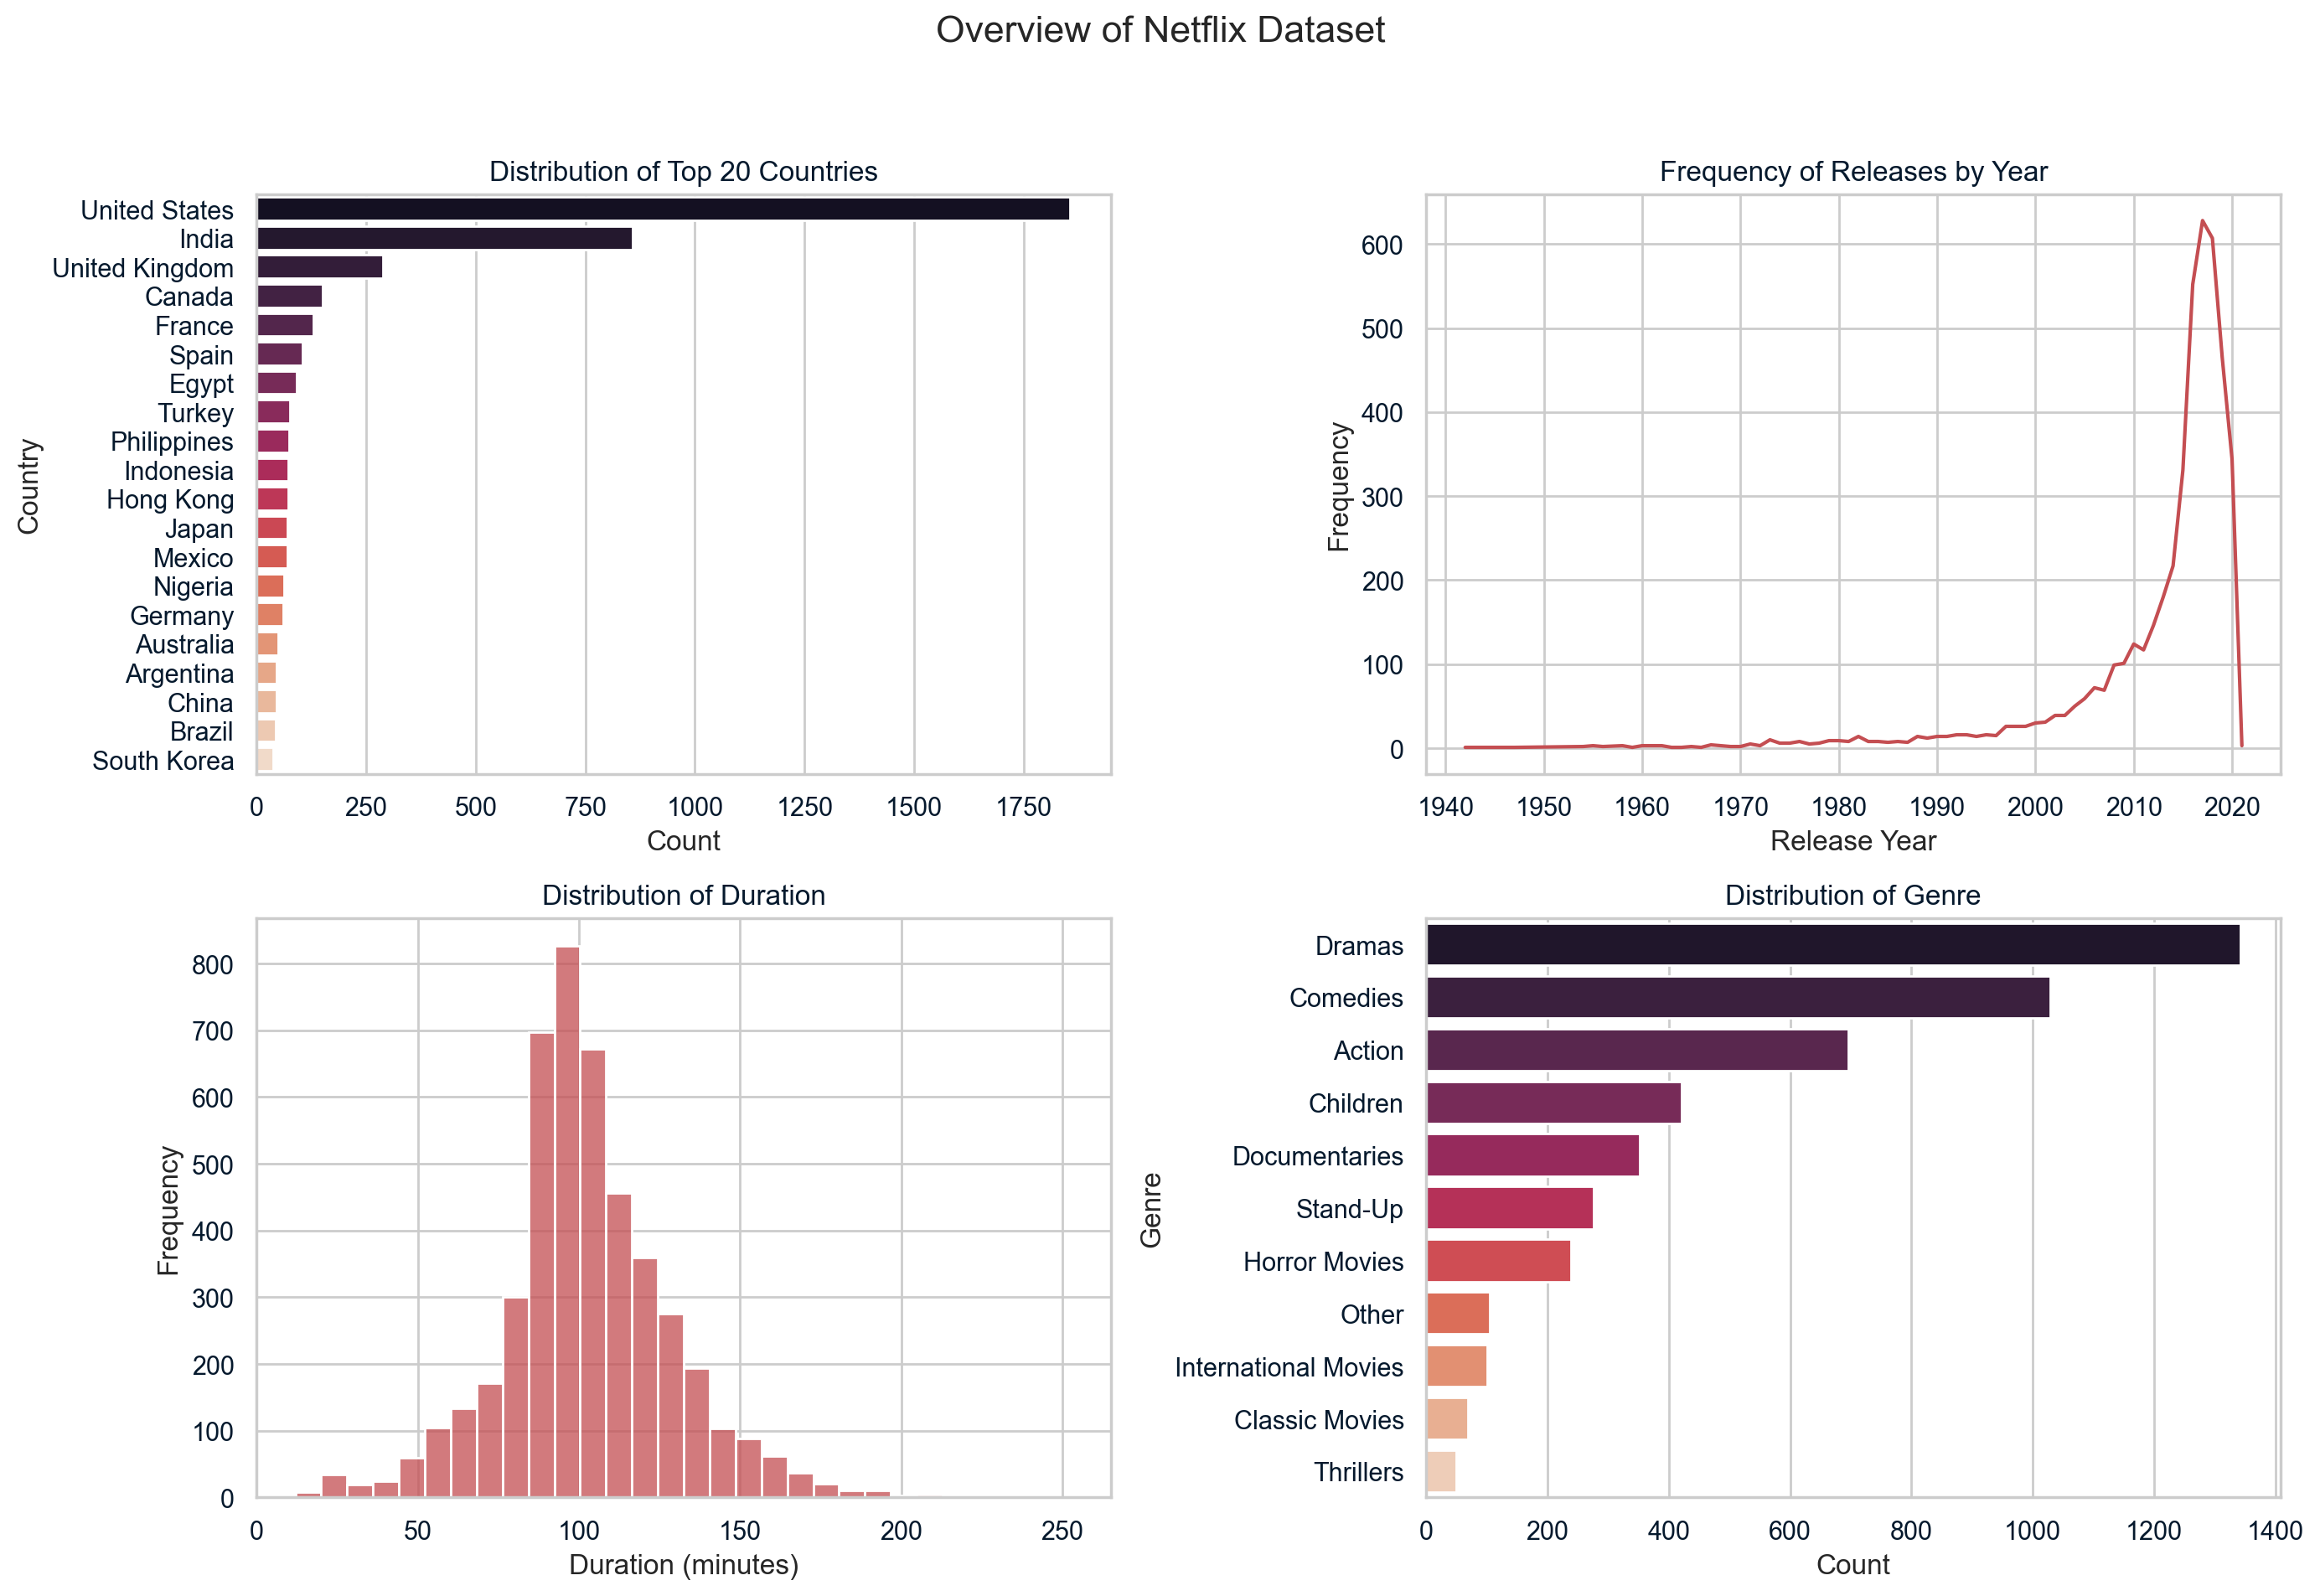

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Overview of Netflix Dataset', fontsize=16)

# Histogram for country
sns.countplot(y='country', data=top_countries, order=top_countries['country'].value_counts().index, ax=axes[0, 0], palette='rocket')
axes[0, 0].set_title('Distribution of Top 20 Countries')
axes[0, 0].set_xlabel('Count')
axes[0, 0].set_ylabel('Country')

# Frequency line plot for release_year
sns.lineplot(x='release_year', y='release_year', data=netflix_df_cleaned, estimator='size', ax=axes[0, 1], color='r')
axes[0, 1].set_title('Frequency of Releases by Year')
axes[0, 1].set_xlabel('Release Year')
axes[0, 1].set_ylabel('Frequency')

# Histogram for duration
sns.histplot(netflix_df_cleaned['duration'], bins=30, ax=axes[1, 0], color='r')
axes[1, 0].set_title('Distribution of Duration')
axes[1, 0].set_xlabel('Duration (minutes)')
axes[1, 0].set_ylabel('Frequency')

# Histogram for genre
sns.countplot(y='genre', data=netflix_df_grouped, order=netflix_df_grouped['genre'].value_counts().index, ax=axes[1, 1], palette='rocket')
axes[1, 1].set_title('Distribution of Genre')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Genre')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Observations: Exploratory Data Analysis

1. **Country Distribution**: The dataset shows that the United States holds a majority of the entries. This is expected as Netflix is a US-based company and has a significant amount of content produced and consumed in the US.

2. **Releases by Year**: There is a noticeable increase in the number of releases after 2010. This trend aligns with Netflix's strategic shift towards producing its own content, which began around this time. The increase also reflects the growing demand for streaming content. However, there is a decline in releases for the years 2020 and 2021, which could be attributed to the data cutoff or possibly the impact of the COVID-19 pandemic on production schedules.

3. **Duration Distribution**: The distribution of content duration appears to be close to a standard distribution, indicating that most content falls within a typical range of viewing times, which is consistent with industry standards for movies and TV shows.

4. **Genre Distribution**: Dramas are the most common genre in the dataset. This could be due to the broad appeal of drama series and films, which often attract a wide audience and are a staple in Netflix's content library.

---
## Visualization & Data Analysis

---
### Are Movies Getting Shorter? Analysis Between Decades and Genres

In this section, we will explore how the duration of movies has evolved over the decades. By examining the average movie lengths for each decade, we aim to uncover trends and patterns that reveal whether movies are getting longer or shorter over time. This analysis will provide insights into the changing nature of film production and audience preferences.

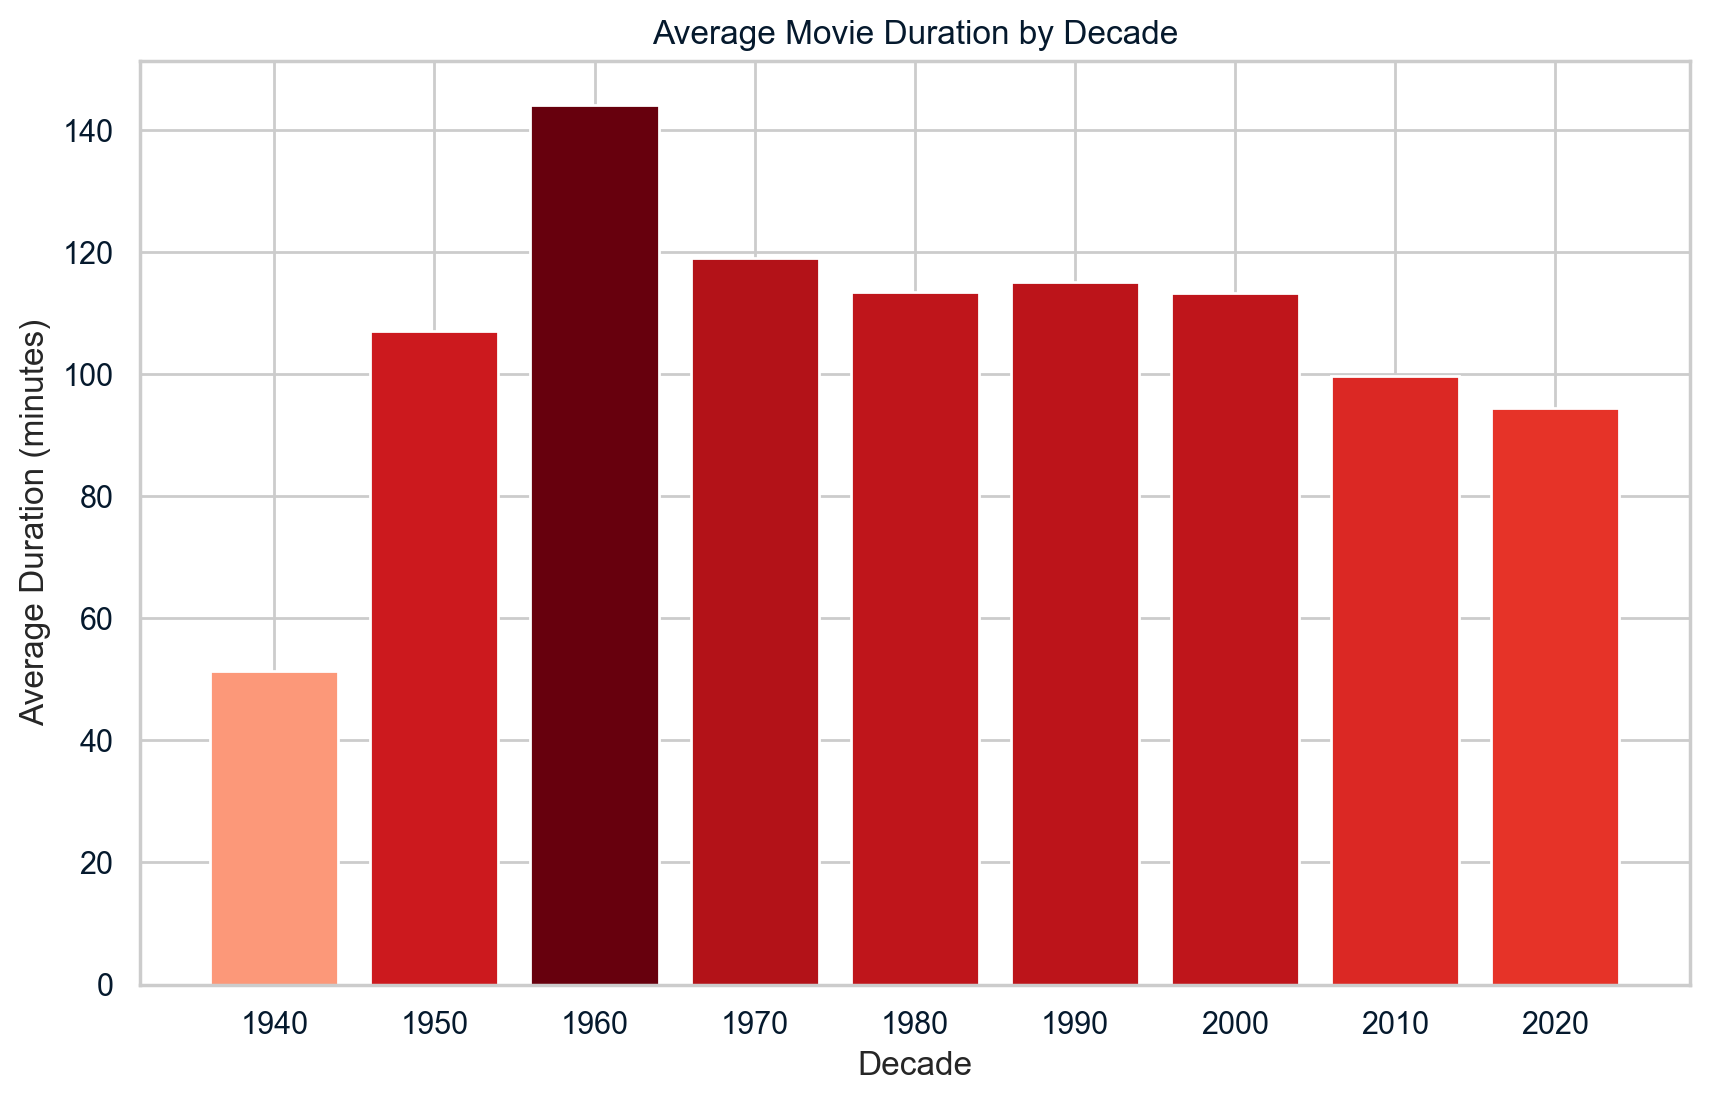

In [59]:
# Average Movie Duration by Decade

# Function to determine the decade
def get_decade(year):
    return (year // 10) * 10

# Add a 'decade' column to the DataFrame
netflix_df_cleaned['decade'] = netflix_df_cleaned['release_year'].apply(get_decade)

# Group by decade and calculate the average duration
decade_duration = netflix_df_cleaned.groupby('decade')['duration'].mean().reset_index()

# Plot the average movie duration by decade
colors = plt.cm.Reds(decade_duration['duration'] / decade_duration['duration'].max())

plt.figure(figsize=(10, 6))
plt.bar(
    decade_duration['decade'], 
    decade_duration['duration'], 
    width=8,
    color=colors
)
plt.xlabel('Decade')
plt.ylabel('Average Duration (minutes)')
plt.title('Average Movie Duration by Decade')
plt.xticks(decade_duration['decade'])
plt.show()

### Observations: Average Movie Duration by Decade

1. **Longest Duration in the 1960s**: The graph shows that movies had the longest average duration in the 1960s. This could be due to the popularity of epic films and musicals during that era, which often had longer runtimes.

2. **Decreasing Trend Over Time**: There is a noticeable trend of decreasing average movie duration from the 1960s onwards. This could be attributed to changes in audience preferences, technological advancements, and the rise of different film genres that favor shorter runtimes.

3. **Modern Era**: In recent decades, the average duration seems to stabilize at a lower level compared to the 1960s. This might reflect the influence of television and digital media, where shorter content is often more consumable.

These insights can help in understanding how the film industry has evolved over time in terms of production and audience engagement.

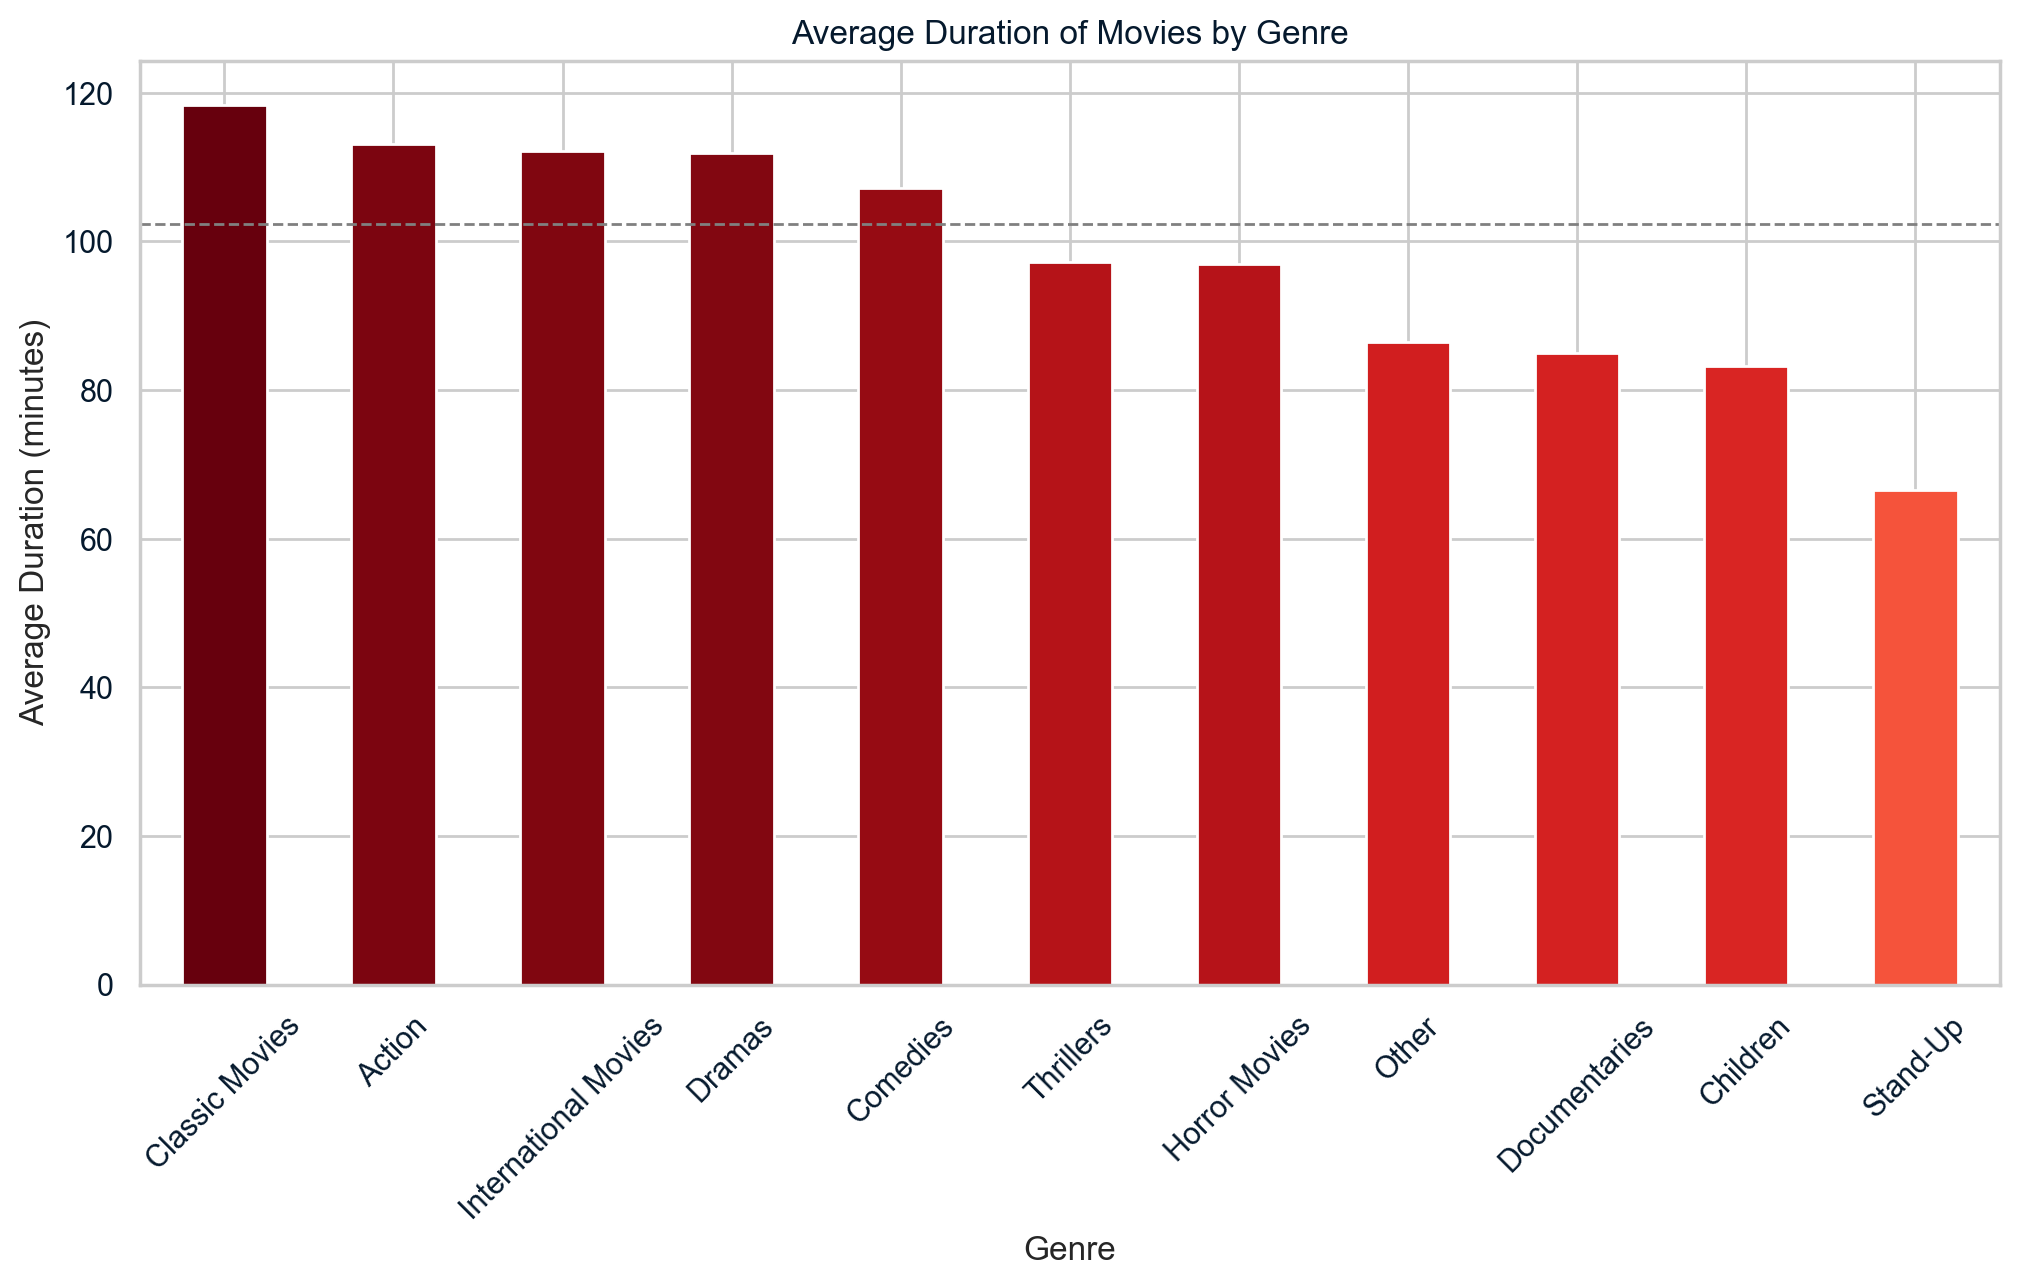

In [60]:
# Average duration by genre
average_duration_by_genre = netflix_df_grouped.groupby('genre')['duration'].mean()
average_duration_by_genre = average_duration_by_genre.sort_values(ascending=False)

# Customize colors
colors = plt.cm.Reds(average_duration_by_genre / average_duration_by_genre.max())

plt.figure(figsize=(12, 6))
average_duration_by_genre.plot(kind='bar', color=colors)

# Draw a line for the average duration of all movies
plt.axhline(netflix_df_grouped['duration'].mean(), color='gray', linestyle='--', linewidth=1)

# Plot configuration
plt.title('Average Duration of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

### Observations: Average Duration by Movie Genre

1. **Classic Movies**: These have the longest average duration, nearly reaching two hours. This might be due to the narrative style and storytelling techniques often employed in classic films, which tend to be more elaborate and detailed.

2. **Action Movies**: Ranking second in terms of duration, action movies often feature extended sequences of action and adventure, which can contribute to their longer runtime.

3. **Shorter Genres**: Genres such as children, standup, and other have the shortest average durations. This is likely because content aimed at children is typically shorter to maintain their attention, and standup shows are often concise performances.

These insights can help in understanding the typical length of movies across different genres, which can be useful for content creators and distributors in planning and marketing their offerings.

---
### Which Genres Dominate? Trends in Genre Popularity

This section provides a detailed examination of trends and patterns in movie genres, offering insights into the evolving preferences of audiences and the film industry's adaptation to these changes. We will analyze the number of movies produced in each genre and the average duration of movies by genre to understand the cinematic landscape from a genre perspective.

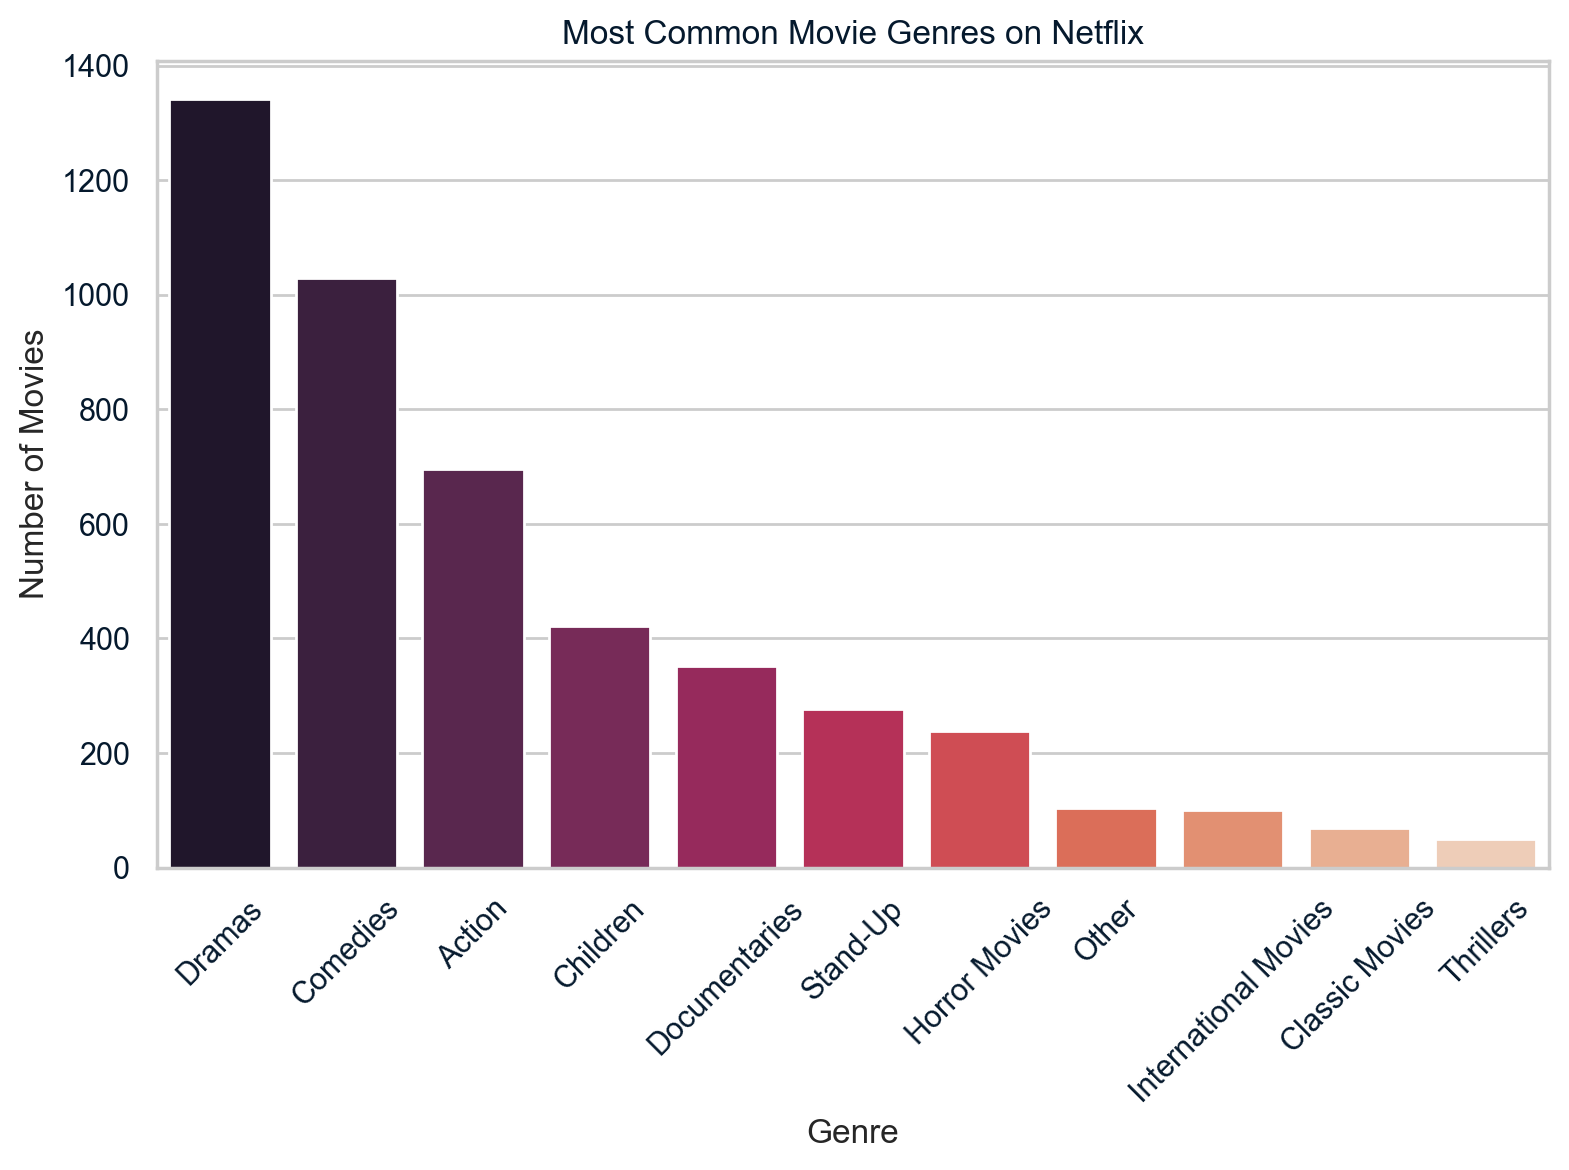

In [61]:
# Frequency of genres in the dataset
plt.figure(figsize=(8, 6))
sns.barplot(x=genre_counts_grouped.index, y=genre_counts_grouped.values, palette='rocket')
plt.title('Most Common Movie Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observations: Dramas Make the Majority
This distribution points to several insights:

1. **Audience Preference**: The high number of dramas suggests that audiences may have a strong preference for this genre. This could be due to the genre's ability to explore complex characters and narratives, which often resonate with viewers on an emotional level.

2. **Industry Trends**: The film industry might be producing more dramas to meet audience demand or because they are perceived as more likely to succeed critically and commercially. Dramas often receive more attention during award seasons, which can also drive production.

3. **Cultural Reflection**: Dramas often reflect societal issues and cultural narratives, suggesting that the dataset might be capturing a wide range of human experiences and societal themes.

4. **Diversity in Storytelling**: While the dominance of dramas is clear, it also highlights the need for diversity in storytelling. Other genres might be underrepresented, which could indicate potential areas for growth and exploration in content creation.

Overall, the prevalence of dramas in the dataset underscores their importance in the cinematic landscape and their impact on both audiences and the industry. _To investigate further_, we will examine drama frequency by country.

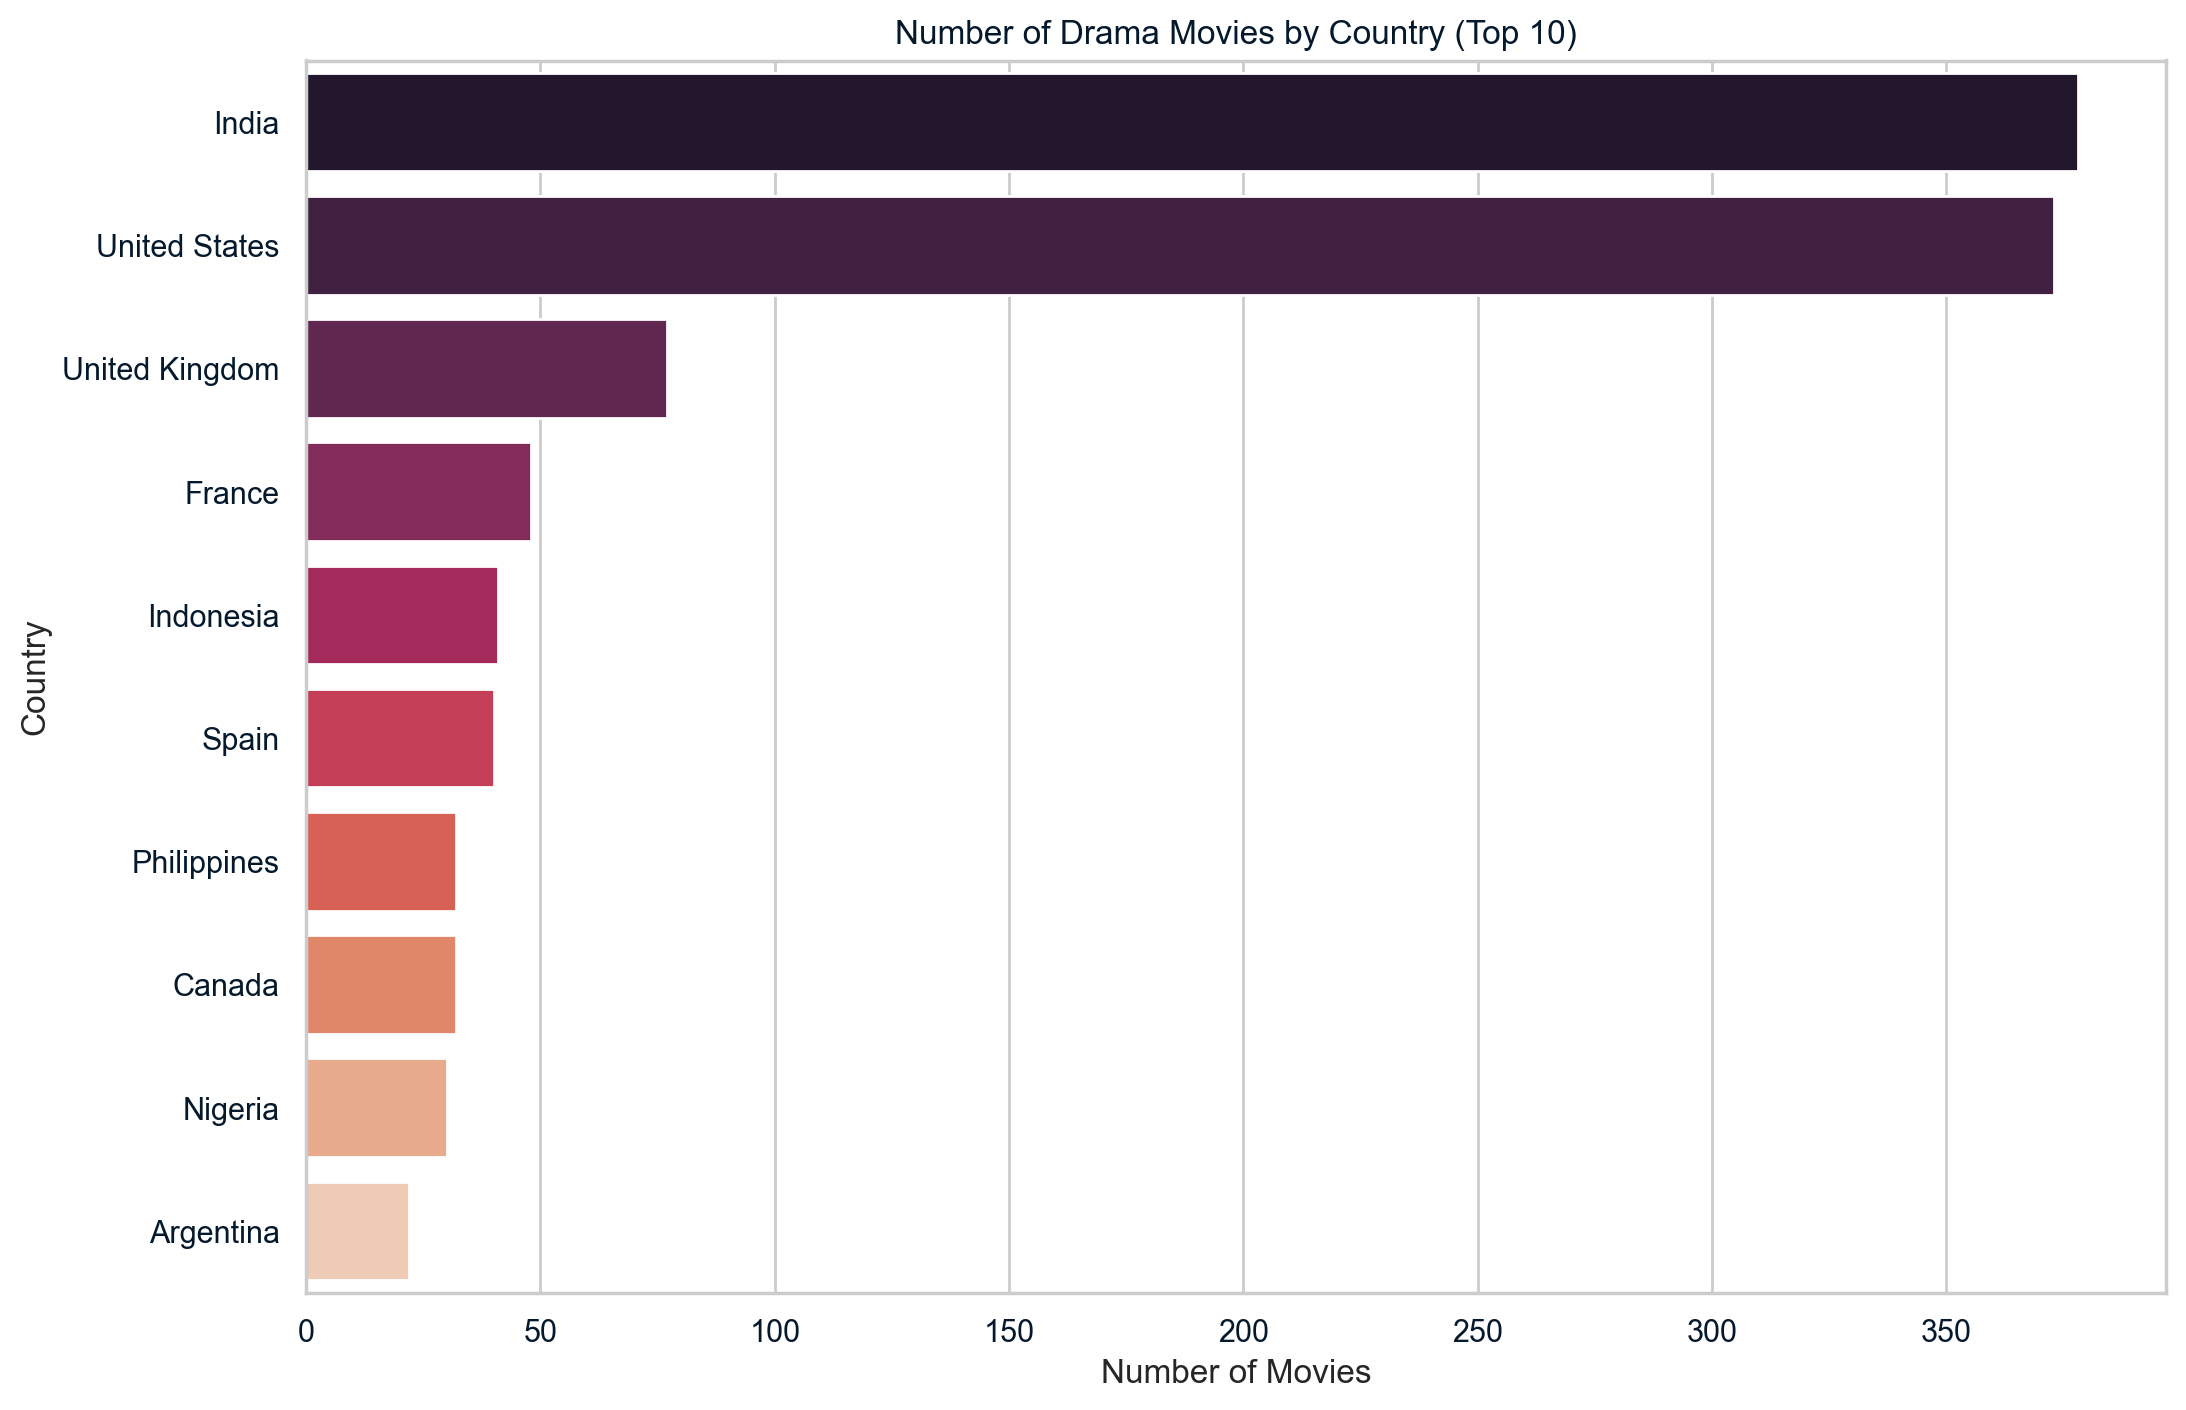

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for the Drama genre
dramas = top_countries[top_countries['genre'].str.contains('Drama', na=False)]

# Count the number of Drama movies by country
drama_country = dramas['country'].value_counts().reset_index()
drama_country.columns = ['country', 'count']
drama_country_10 = drama_country.head(10)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=drama_country_10, x='count', y='country', palette='rocket')
plt.title('Number of Drama Movies by Country (Top 10)')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.show()

Interestingly, a majority of drama movies in the Netflix dataset come from India. It begs the question: Is India’s drama output high because they make a lot of movies, or because they especially prefer dramas? Let's dig deeper.

In [63]:
# Get the list of the top 10 drama countries
drama_countries_list = drama_country_10['country'].tolist()

# Get total value counts of movies from these countries
total_country = netflix_df_cleaned[netflix_df_cleaned['country'].isin(drama_countries_list)]['country'].value_counts().reset_index()

# Rename columns to prepare for merge
drama_country_10.rename(columns={"count": "dramas"}, inplace=True)
total_country.rename(columns={"country": "total_movies", "index": "country"}, inplace=True)

# Merge DataFrames to compare
merged_drama = pd.merge(total_country, drama_country_10, on="country")

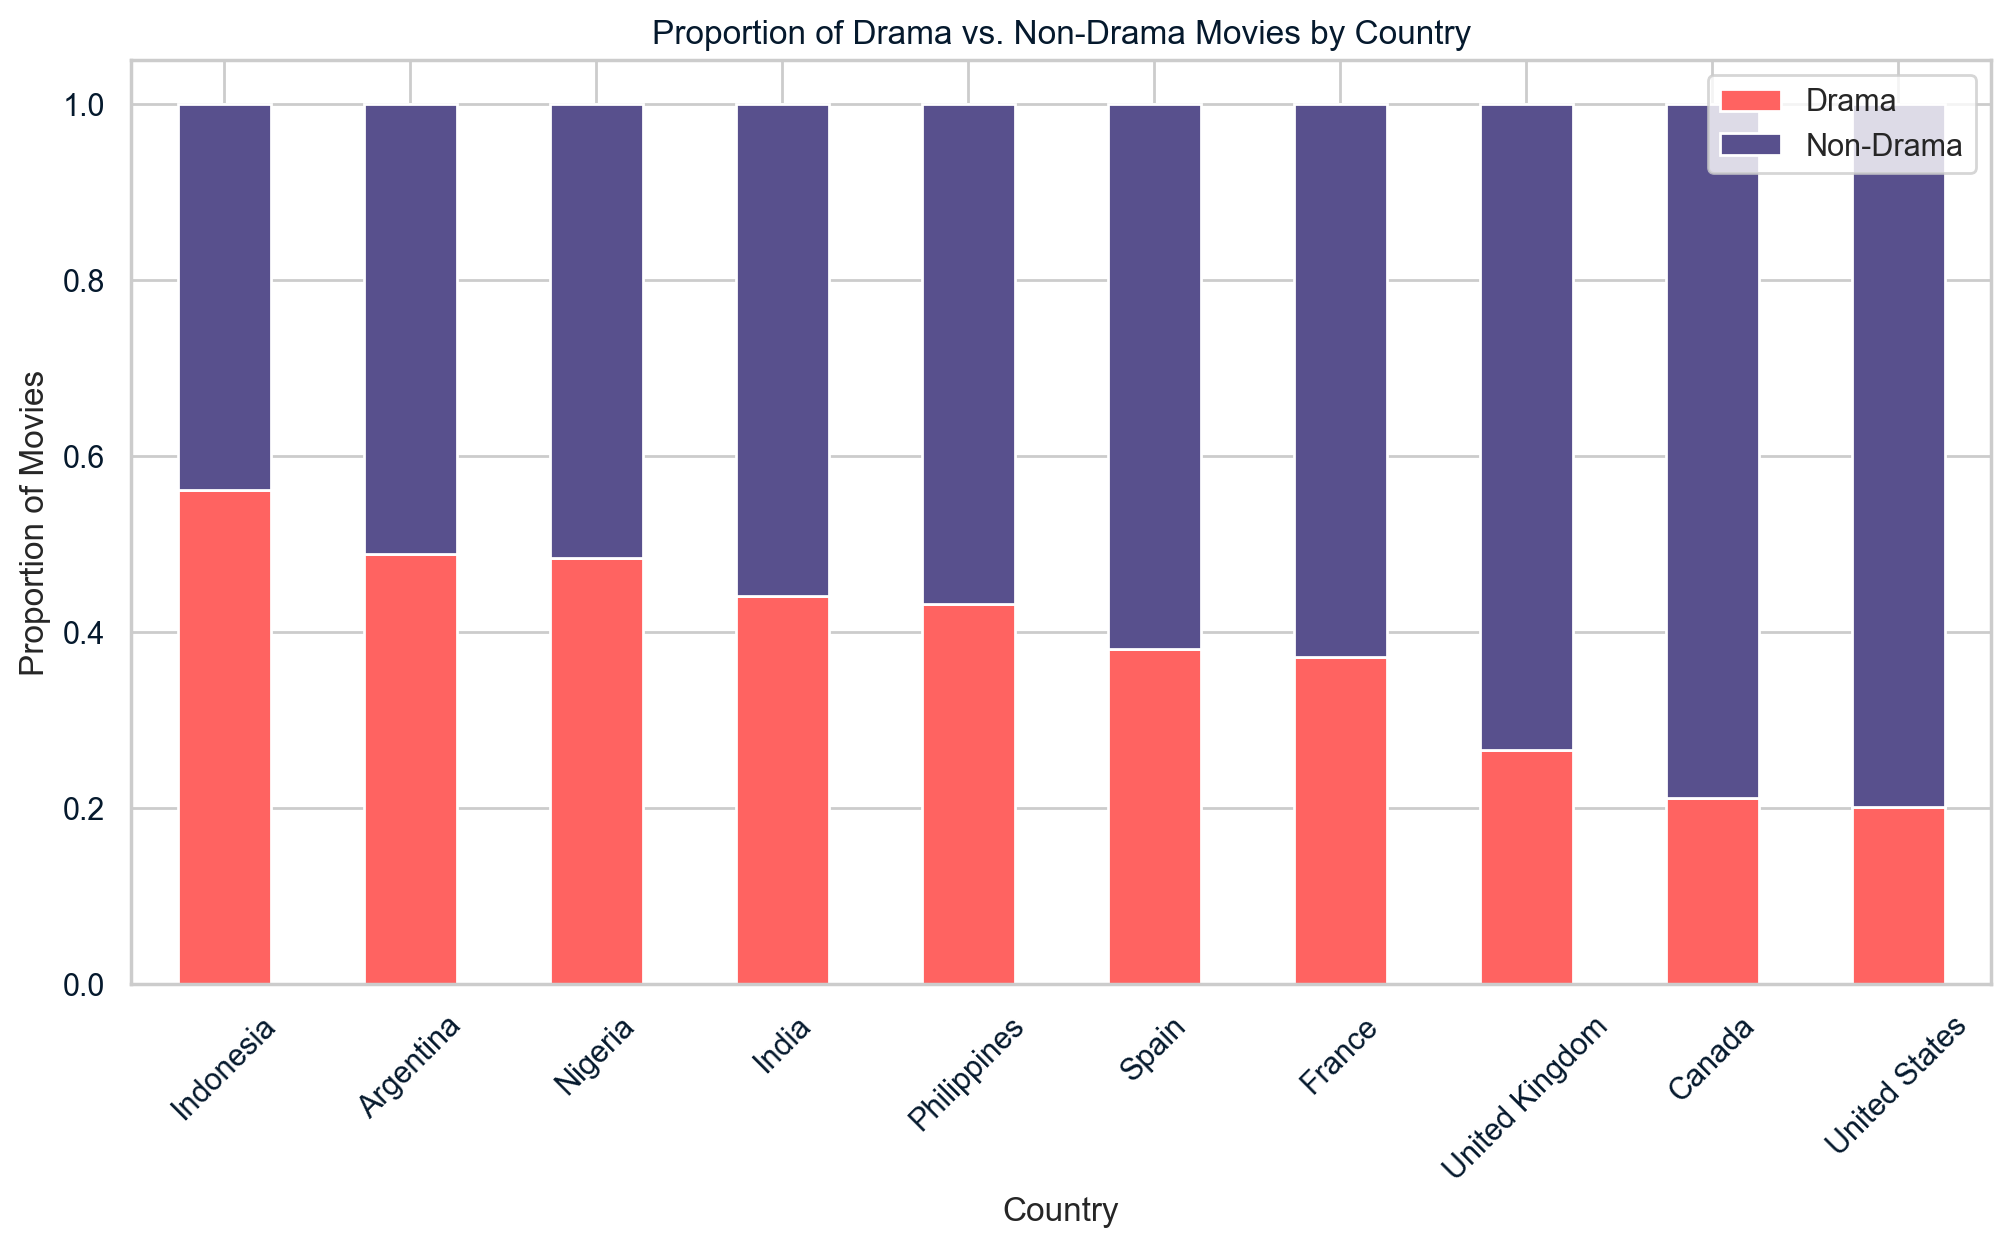

In [64]:
# Calculate proportions
merged_drama['non_drama'] = merged_drama['total_movies'] - merged_drama['dramas']

# Normalize proportions
merged_drama['drama_prop'] = merged_drama['dramas'] / merged_drama['total_movies']
merged_drama['non_drama_prop'] = merged_drama['non_drama'] / merged_drama['total_movies']

# Pivot to wide format
plot_df = merged_drama[['country', 'drama_prop', 'non_drama_prop']].set_index('country')
plot_df = plot_df.sort_values('drama_prop', ascending=False) 

# Plot
plot_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#ff6361', '#58508d'])
plt.title('Proportion of Drama vs. Non-Drama Movies by Country')
plt.ylabel('Proportion of Movies')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(labels=['Drama', 'Non-Drama'])
plt.show()


### Observations: Drama as a Share of Total Movies by Country

- **Indonesia**: This country has the highest proportion of drama movies compared to non-drama movies. This indicates that a significant portion of the movies from Indonesia in the dataset are dramas.

- **India**: Although India has the highest number of drama movies, these dramas constitute only about half of the total movies from India in the dataset. This suggests a diverse movie production industry in India, with a substantial number of non-drama movies as well.

- **United States**: Despite having the largest number of entries in the dataset, only about 20% of these entries are dramas. This highlights the diversity in the types of movies produced in the United States, with a larger proportion being non-drama movies.

Overall, the chart provides insights into the movie production trends in different countries, particularly in terms of the genre distribution between drama and non-drama movies.

---
### Worldwide Cinema: A Comparative Analysis of Global Film Production

This section delves into the data to compare the film output of various nations in the current dataset. By analyzing film output, we can identify global production trends and see which countries contribute most to Netflix’s catalog.

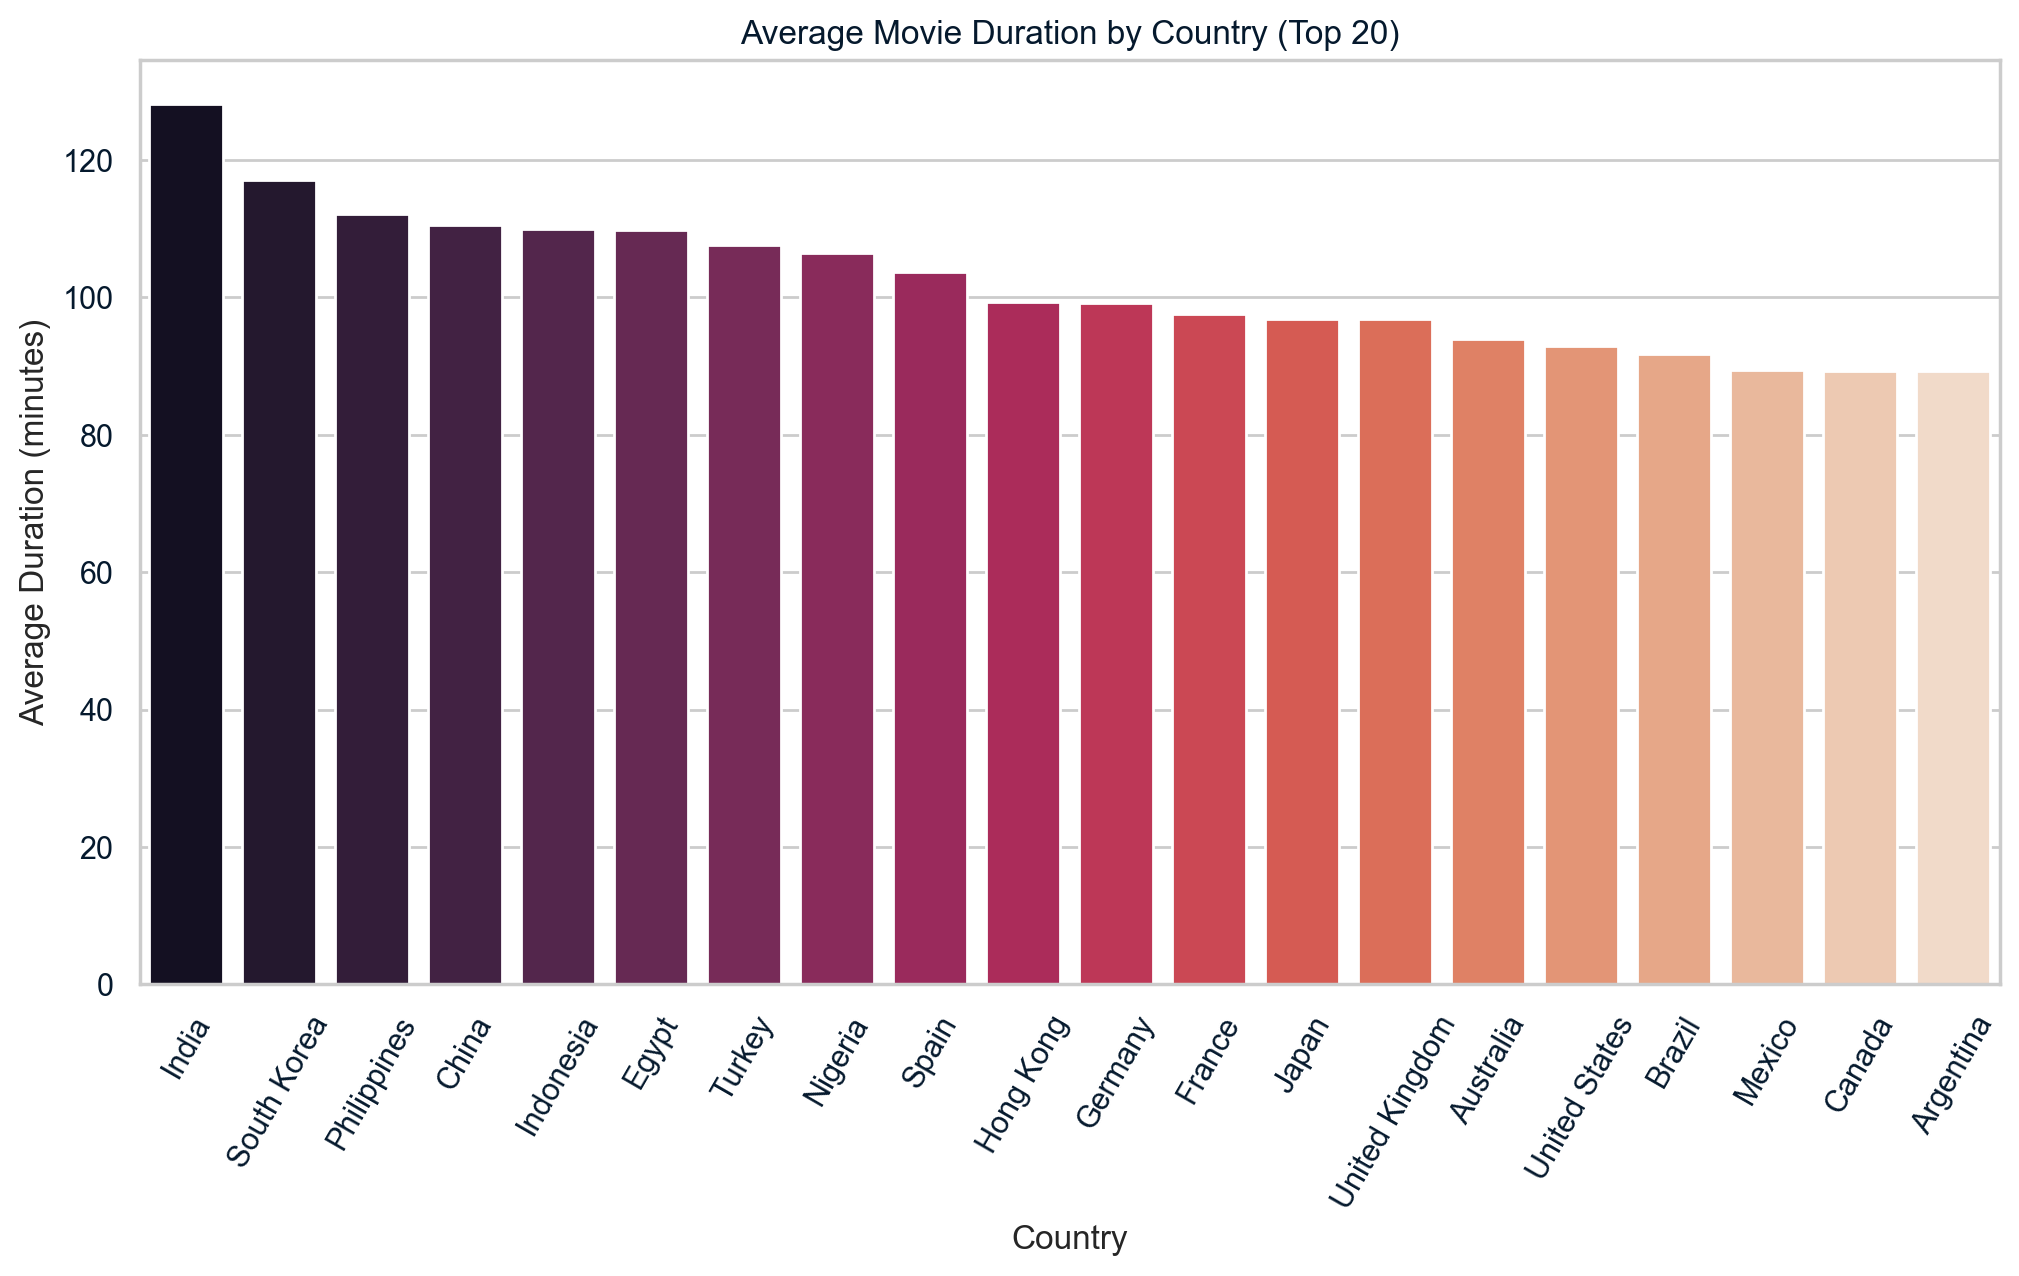

In [65]:
# Group by country and calculate the average duration
country_duration = top_countries.groupby('country')['duration'].mean().sort_values(ascending=False).reset_index()

# Plot duration by country
plt.figure(figsize=(12, 6))
sns.barplot(data=country_duration, x='country', y='duration', palette='rocket')
plt.xticks(rotation=60)
plt.title('Average Movie Duration by Country (Top 20)')
plt.ylabel('Average Duration (minutes)')
plt.xlabel('Country')
plt.show()

From the bar graph, one feature stands out: **Movies from India** tend to have a higher average duration compared to other countries. This could be due to cultural preferences for longer storytelling formats in Indian cinema.

### Most Popular Movie Genres by Country

This graphic helps us move beyond raw movie counts to understand what kinds of films each country tends to produce. Here we look at the 5 most frequent countries in the dataset and analyze the distributions of genre. Given that the United States dominates the chart due to a larger number of entries, we can normalize the data to show the countries' proportional contributions by genre. 

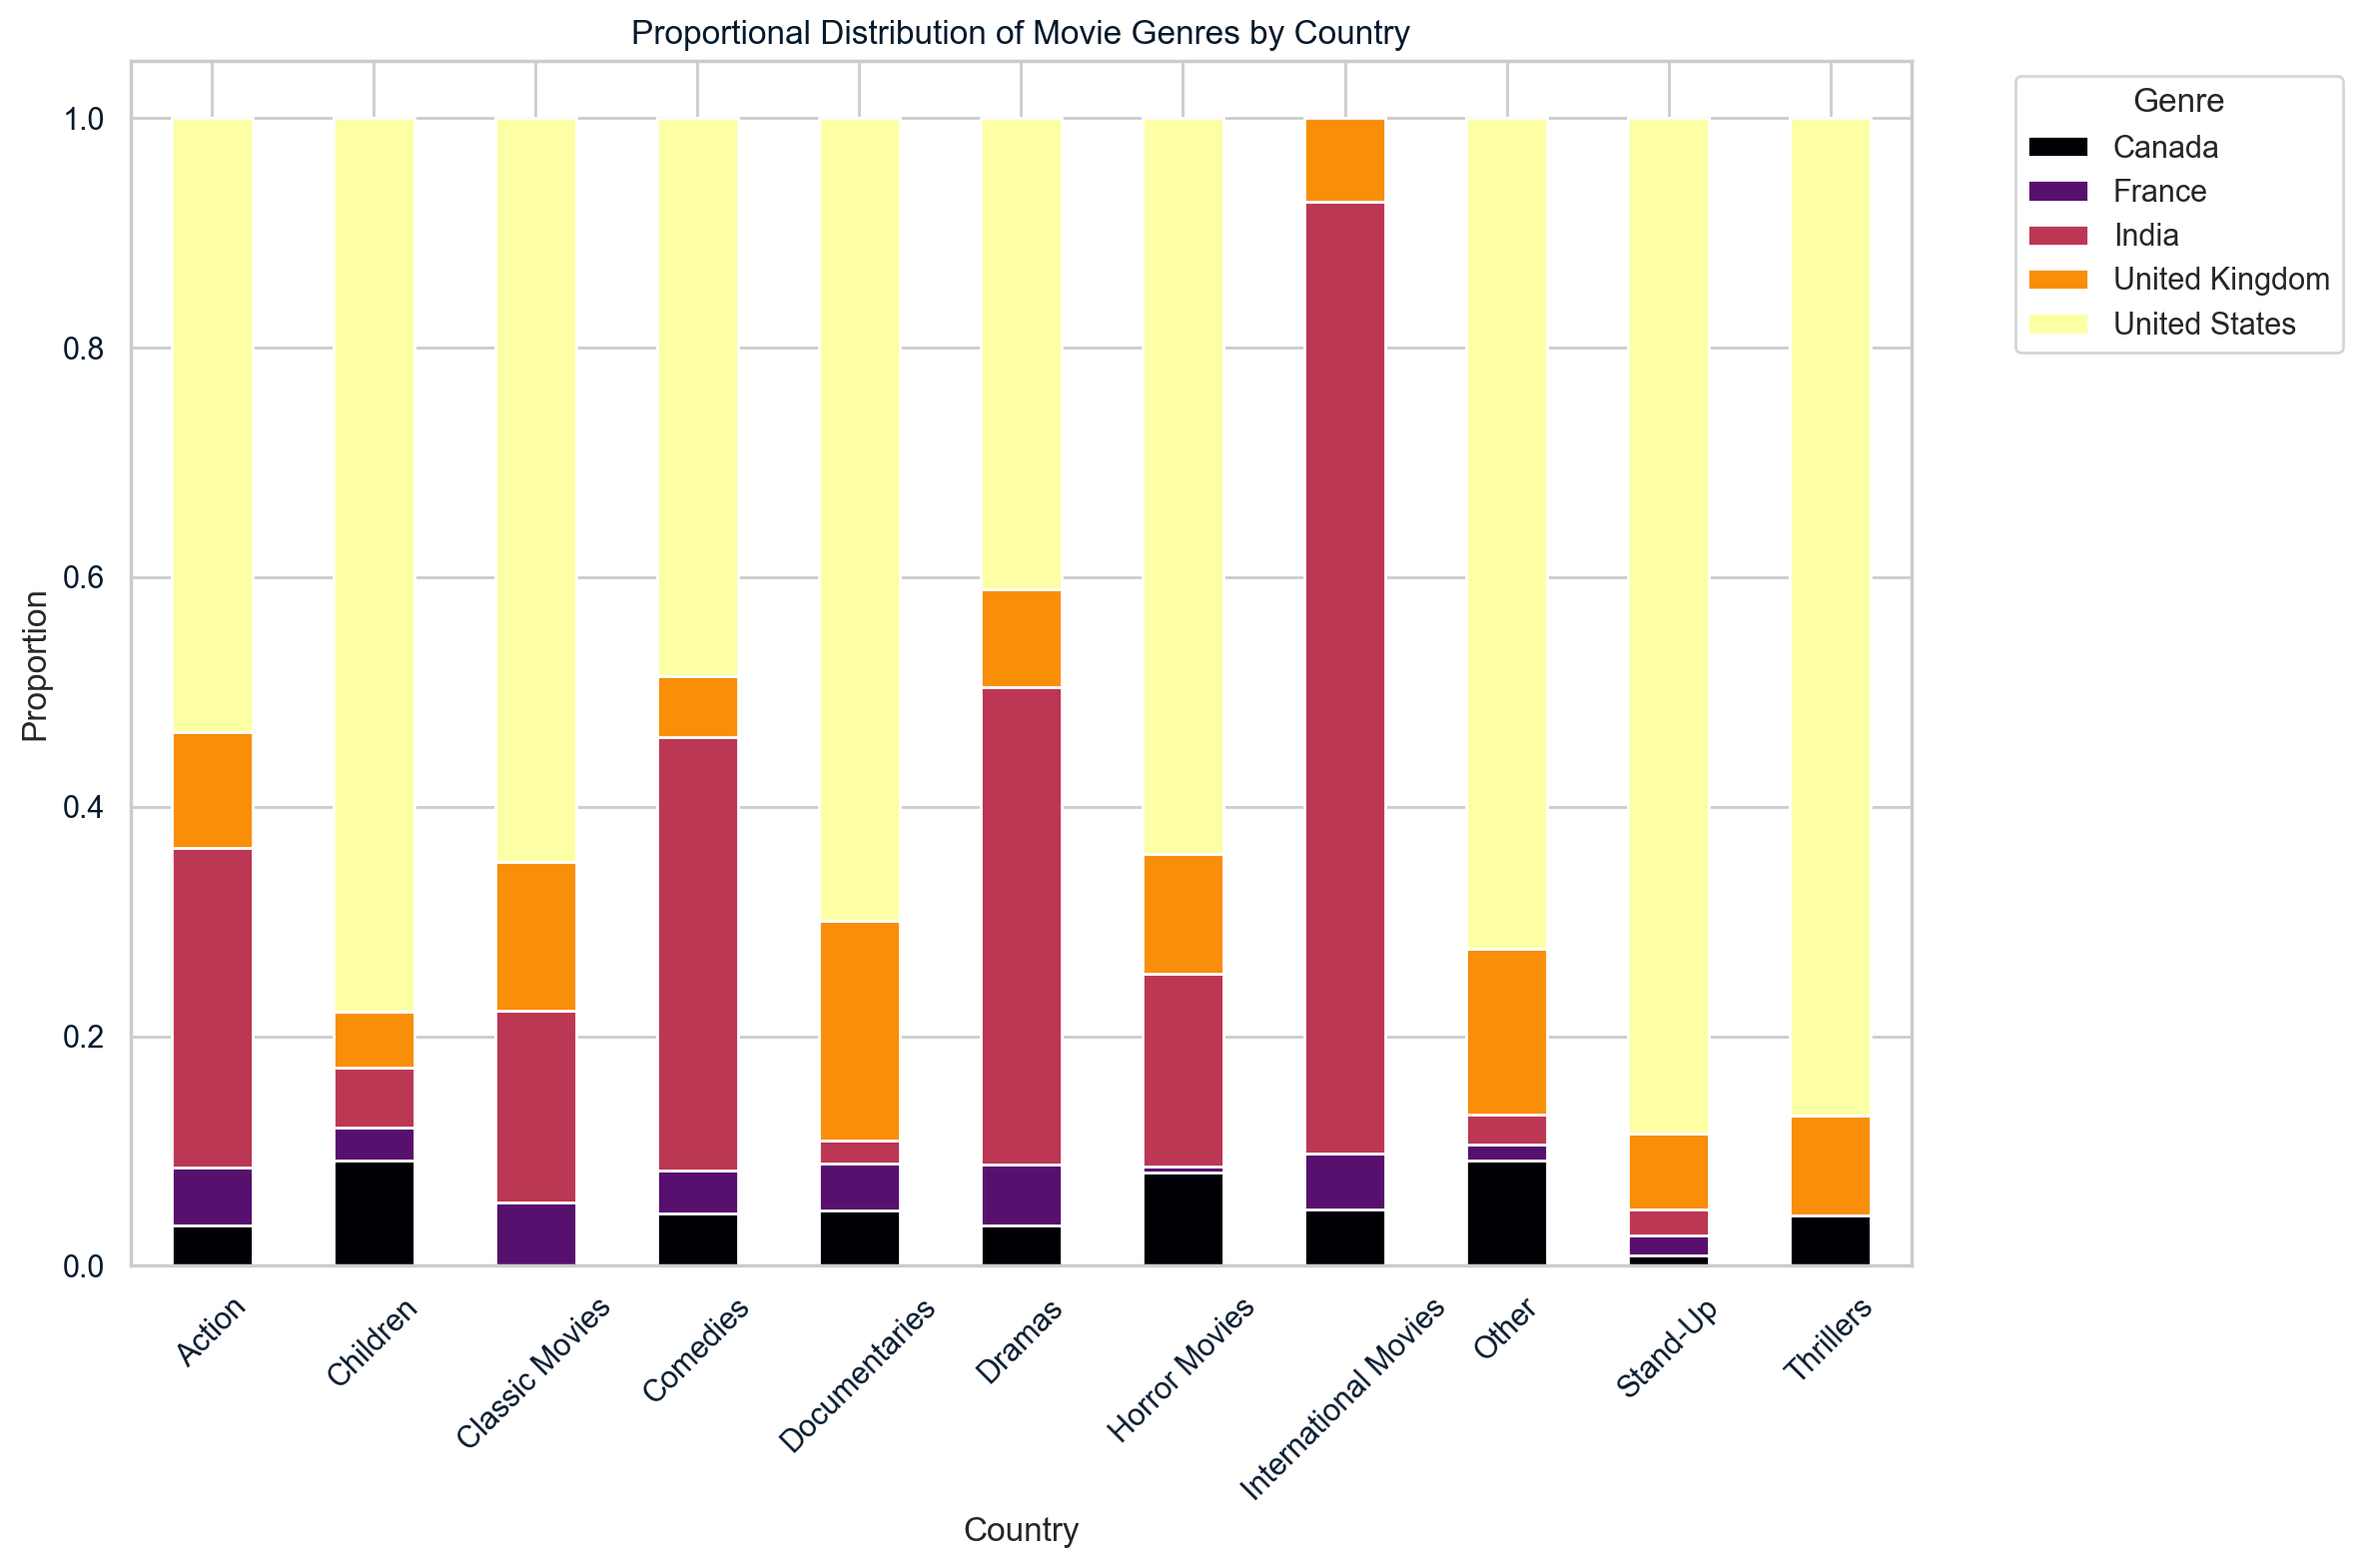

In [92]:
# Filter the top 5 countries from the dataset
top_5_countries_list = top_5_countries['country'].unique()

# Filter the dataframe for the top 5 countries
top_5_genres = netflix_df_grouped[netflix_df_grouped['country'].isin(top_5_countries_list)]

# Count the occurrences of each genre per country
genre_counts = top_5_genres.groupby(['country', 'genre']).size().reset_index(name='count')

# Pivot the data to have countries as rows and genres as columns
genre_pivot = genre_counts.pivot(index='genre', columns='country', values='count').fillna(0)

# Normalize the data to get proportions
genre_proportions = genre_pivot.div(genre_pivot.sum(axis=1), axis=0)

# Plot the stacked bar chart
plt.figure(figsize=(12, 8))
genre_proportions.plot(kind='bar', stacked=True, colormap='inferno', ax=plt.gca())
plt.title('Proportional Distribution of Movie Genres by Country')
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---
## Conclusion

From our analysis, we observed several key insights about the Netflix movie dataset:

1. **Duration of Movies by Country**: Movies from India tend to have a higher average duration compared to other countries. This could be attributed to cultural preferences for longer storytelling formats in Indian cinema.
2. **Genre Distribution**: The United States dominates the dataset in terms of the number of entries. However, when normalized, we can see the proportional contributions of different genres by country, providing a clearer picture of each country's cinematic landscape.
4. **Country Analysis**: We examined the distribution of movies by country, highlighting which countries produce the most content and their contributions to the global cinematic landscape.

These findings highlight the diversity in movie durations, genre preferences, and production countries, offering a glimpse into the global film industry's varied storytelling approaches.

## Further Exploration

While our current analysis provides valuable insights, there are several avenues for further exploration:

1. **Temporal Analysis**: Investigate how the duration and genre distribution of movies have evolved over different decades. This could reveal trends and shifts in cinematic preferences over time.
2. **Director and Cast Influence**: Analyze the impact of directors and cast on movie durations and genres. This could help identify key influencers in the film industry.
3. **Audience Reception**: Incorporate audience ratings and reviews to understand how movie durations and genres correlate with viewer satisfaction and popularity.
4. **Regional Comparisons**: Expand the analysis to include more countries and regions, providing a more comprehensive view of global cinematic trends.
5. **Streaming Trends**: Examine how the rise of streaming platforms like Netflix has influenced movie durations and genre preferences compared to traditional cinema.
6. **Language Distribution**: Analyze the distribution of movies by language to understand the diversity of content.

By delving into these areas, we can gain a deeper understanding of the factors shaping the film industry and how they resonate with audiences worldwide.

## Credits
Image by <a href="https://pixabay.com/users/igorovsyannykov-6222956/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=2974645">Igor Ovsyannykov</a> from <a href="https://pixabay.com//?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=2974645">Pixabay</a>

Data by [DataCamp - Nefflix Movie Data](https://www.datacamp.com/datalab/datasets/dataset-python-netflix-movie-data)